In [15]:
# import pacakges

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D

from sklearn.model_selection import train_test_split
import pandas as pd 


In [16]:
df = pd.read_csv("../preprocessing/output.csv")
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [17]:
# Tokenize the words 
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

# Add 1 for the zero's 
vocab_length = len(word_tokenizer.word_index) + 1

In [18]:
# Add padding to the sentences if need be 
maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [19]:
# Load GloVe word embeddings and create an Embeddings Dictionary
glove_path = "/Users/dylan/Documents/school/big_data/scientist_engineer_assignments/assignment_2/dask-machine-learning/miscelanious/glove.6B/glove.6B.100d.txt"

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open(glove_path, encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [20]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [21]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

/Users/dylan/Documents/school/big_data/scientist_engineer_assignments/assignment_2/dask-machine-learning/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,591,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,591,900 (9.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,591,900 (9.89 MB)

None


In [28]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=10_000, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - acc: 0.9885 - loss: 0.0390 - val_acc: 0.9727 - val_loss: 0.0981
Epoch 2/6
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - acc: 0.9890 - loss: 0.0390 - val_acc: 0.9727 - val_loss: 0.0982
Epoch 3/6
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - acc: 0.9891 - loss: 0.0382 - val_acc: 0.9726 - val_loss: 0.0998
Epoch 4/6
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - acc: 0.9882 - loss: 0.0405 - val_acc: 0.9725 - val_loss: 0.0996
Epoch 5/6
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - acc: 0.9892 - loss: 0.0381 - val_acc: 0.9727 - val_loss: 0.0997
Epoch 6/6
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - acc: 0.9889 - loss: 0.0388 - val_acc: 0.9727 - val_loss: 0.0995


In [31]:
score = snn_model.evaluate(X_test, y_test, verbose=1)

543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9684 - loss: 0.1212


In [32]:
print("Test Loss function:", score[0])
print("Test Accuracy:", score[1])

Test Loss function: 0.1039641797542572
Test Accuracy: 0.972195029258728


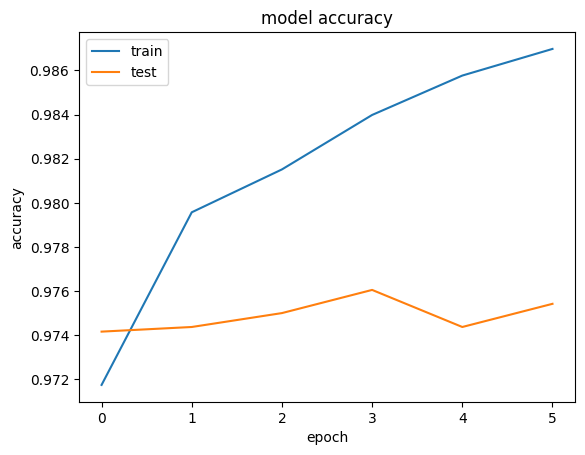

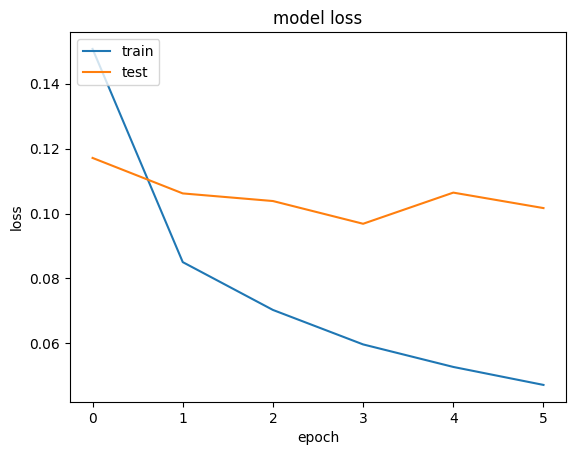

In [13]:
import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()